# Logistic Regression

- Data Preparation
- Visualization
- Create train and test set
- Create a Logistic Regression Model
- Predictions
- Decision Boundary
- How to use sk-learn (scikit learn)

In [14]:
# Data Preparation

In [3]:
## Using Numpy

import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.multivariate_normal?

In [20]:
### data generation

mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1],[0.1, 1.2]])

mean_02 = np.array([5, 7])
cov_02 = np.array([[1.2, 0.1],[0.1, 1.4]])

class_1 = np.random.multivariate_normal(mean_01, cov_01, 500)
class_2 = np.random.multivariate_normal(mean_02, cov_02, 500)

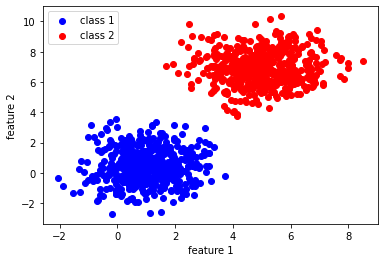

In [21]:
### data visualization

plt.scatter(class_1[:,0], class_1[:,1], color = "blue", label = "class 1")
plt.scatter(class_2[:,0], class_2[:,1], color = "red", label = "class 2")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

In [32]:
### data preparation

class_1 = np.append(class_1, np.zeros((500,1)), axis=1)
class_2 = np.append(class_2, np.ones((500,1)), axis=1)

In [41]:
data = np.append(class_1, class_2, axis=0)

In [42]:
print(data.shape)

(1000, 3)


In [43]:
#### data shuffling to rearrange points randomly in array
np.random.shuffle(data)

In [44]:
print(data[:10])

[[ 2.6519169   7.60988907  1.        ]
 [ 5.36252247  8.08039304  1.        ]
 [ 6.69704879  6.76386025  1.        ]
 [ 0.37377269 -0.57361338  0.        ]
 [ 0.39830997  2.43989281  0.        ]
 [ 6.02801587  5.13699059  1.        ]
 [ 1.20321866 -1.03218416  0.        ]
 [ 0.1220601   1.92059367  0.        ]
 [ 5.69194805  7.925531    1.        ]
 [ 1.94134426 -0.3924064   0.        ]]


In [45]:
# Create train and test set

In [57]:
X_train = data[:800, :-1]
Y_train = data[:800, -1]

X_test = data[800:, :-1]
Y_test = data[800:, -1]

In [58]:
X_train.shape

(800, 2)

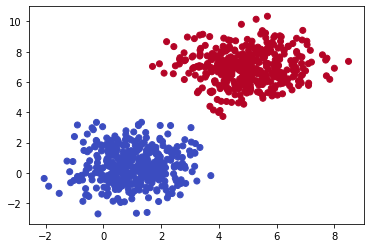

In [59]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.coolwarm)
plt.show()

In [60]:
## Data Normalization

X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train = (X_train - X_mean)/X_std

X_test = (X_test - X_mean)/X_std

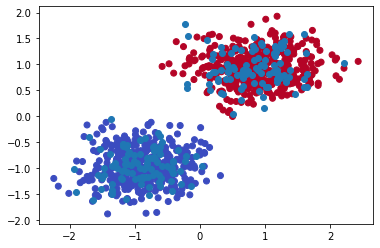

In [62]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:,0], X_test[:,1])
plt.show()

In [66]:
# Create a Logistic Regression Model

In [64]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [90]:
def hypothesis(X, theta):
    """
    params:
    X - (m, 1+n)
    theta - (1+n, 1)
    
    return:
        vector (m, 1) = prediction
    """
    z = np.dot(X, theta)
    return sigmoid(z)

In [91]:
def error(X, Y, theta):
    """
    params:
    X - (m, 1+n)
    Y - (m, 1)
    theta - (1+n, 1)
    
    return:
        scalar_value = loss
    """
    Y_ = hypothesis(X, theta)
    
    ## error of each data-points
    error_vector = (Y*np.log(Y_)) + ((1-Y)*np.log(1-Y_))
    
    return -np.mean(error_vector)

In [92]:
def gradient(X, Y, theta):
    """
    params:
    X - (m, 1+n)
    Y - (m, 1)
    theta - (1+n, 1)
    
    return:
        vector (1+n, 1) = gradient -> sum(Y_ - Y)*X
    """
    
    Y_ = hypothesis(X, theta)
    m = X.shape[0]
    grad = np.dot(X.T, (Y - Y_))
    
    return grad/m

In [99]:
def gradientDescent(X, Y, lr = 0.5, max_epochs = 500):
    """
    params:
    X - (m, n)
    Y - (m, )
    
    return:
        vector (1+n, 1) = optimized-theta
    """
    
    m = X.shape[0]
    n = X.shape[1]
    X0 = np.ones((m,1))
    X = np.hstack((X0, X))
    
    Y = Y.reshape((-1,1))
    
    theta = np.zeros((1+n, 1))
    theta_list = []
    error_list = []
    
    for i in range(max_epochs):
        grad = gradient(X, Y, theta)
        theta = theta + lr * grad
        theta_list.append(theta)
        
        e = error(X, Y, theta)
        error_list.append(e)
        
    return theta_list, error_list

In [100]:
print(X_train.shape, Y_train.shape)

(800, 2) (800,)


In [101]:
theta_list, error_list = gradientDescent(X_train, Y_train)

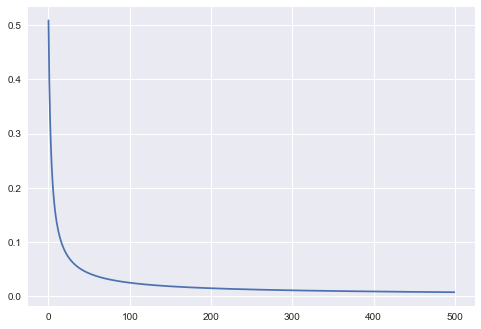

In [102]:
plt.style.use("seaborn")
plt.plot(error_list)
plt.show()

In [132]:
def eq(class1, theta):
    return (theta[0][0] + theta[1][0]*class1)/theta[2][0]

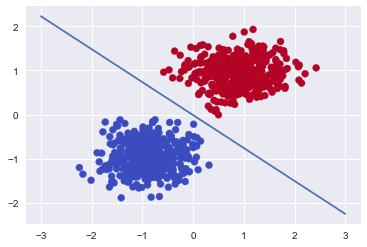

In [133]:
x1 = np.arange(-3, 4)
x2 = -eq(x1, theta_list[len(theta_list)-1])

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap= plt.cm.coolwarm)
plt.plot(x1, x2)
plt.show()

In [134]:
%matplotlib inline
import matplotlib.animation as animation

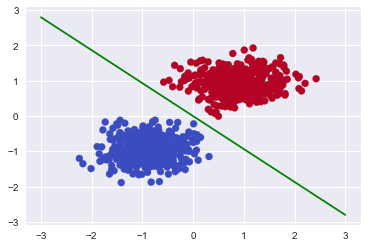

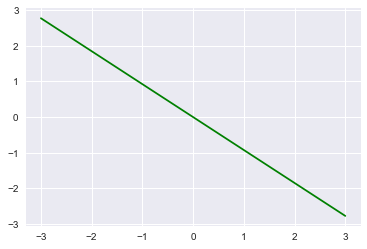

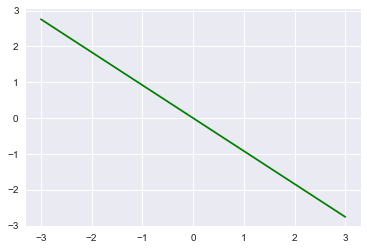

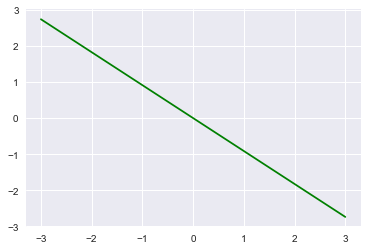

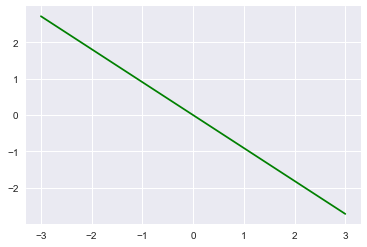

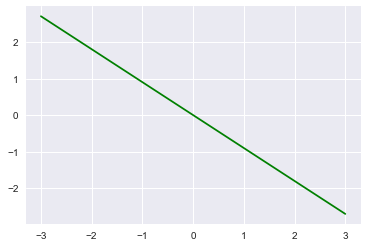

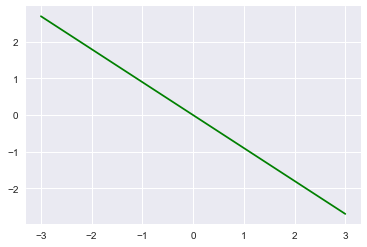

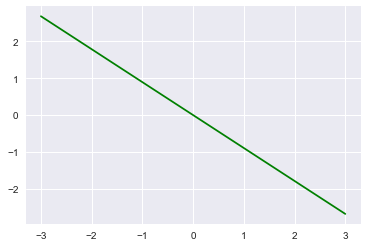

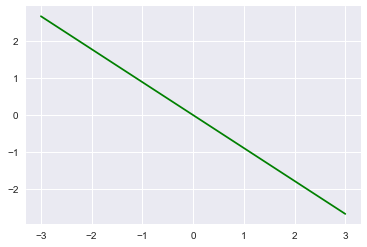

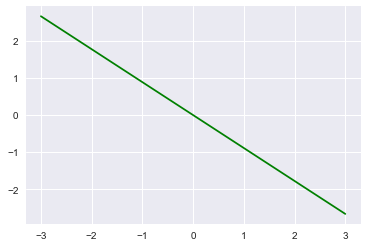

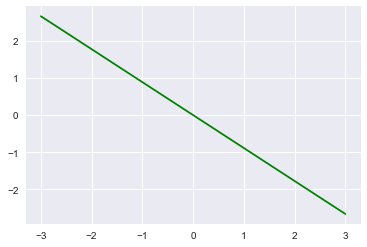

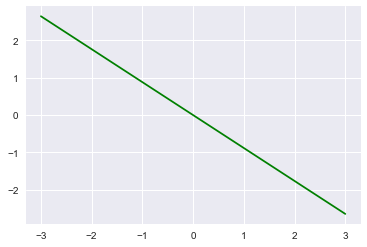

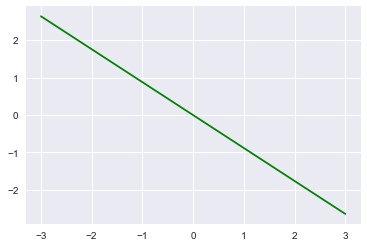

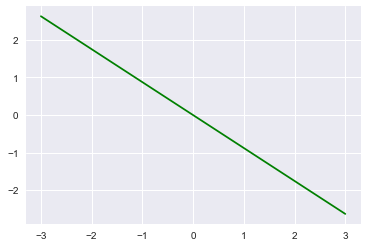

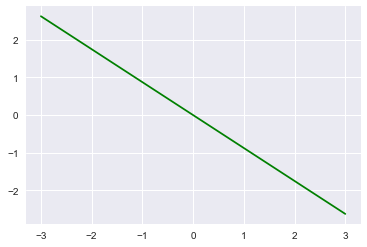

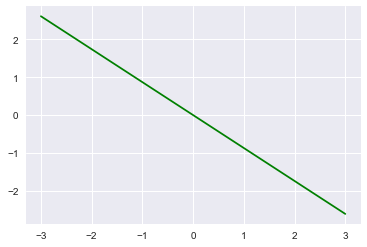

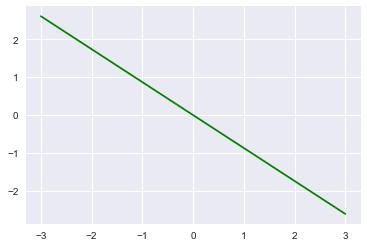

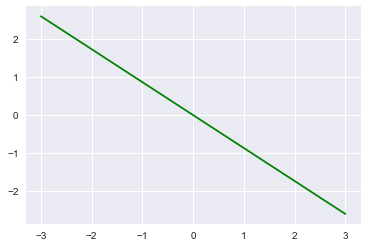

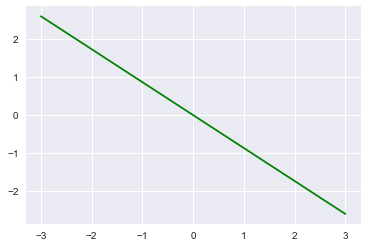

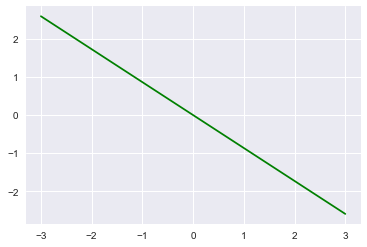

KeyboardInterrupt: 

In [117]:
x1 = np.arange(-3, 4)

fig, ax = plt.subplots()

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap= plt.cm.coolwarm)
for i in range(len(theta_list)):
    x = -eq(x1, theta_list[i])
    plt.plot(x1, x, "green")
    plt.draw()
    plt.pause(1)
    plt.clf()
plt.show()

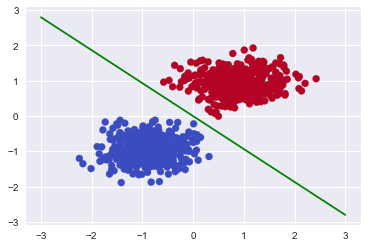

In [137]:
x1 = np.arange(-3, 4)

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap= plt.cm.coolwarm)
x3 = -(0.22014578*x1)/0.23599574
plt.plot(x1, x3, "green")
plt.show()

In [122]:
theta_list

[array([[0.        ],
        [0.22014578],
        [0.23599574]]),
 array([[1.60242492e-05],
        [3.89103855e-01],
        [4.20410604e-01]]),
 array([[9.15816917e-05],
        [5.22424052e-01],
        [5.68571551e-01]]),
 array([[2.43267942e-04],
        [6.31195475e-01],
        [6.91449481e-01]]),
 array([[4.65706799e-04],
        [7.22543131e-01],
        [7.96159139e-01]]),
 array([[7.46181207e-04],
        [8.01060924e-01],
        [8.87335045e-01]]),
 array([[0.00107156],
        [0.86980754],
        [0.96809371]]),
 array([[0.00143055],
        [0.93089523],
        [1.04060737]]),
 array([[0.00181405],
        [0.98583301],
        [1.10644132]]),
 array([[0.00221496],
        [1.0357317 ],
        [1.16675697]]),
 array([[0.00262777],
        [1.08143036],
        [1.22243809]]),
 array([[0.00304827],
        [1.12357705],
        [1.27417202]]),
 array([[0.00347318],
        [1.16268212],
        [1.32250348]]),
 array([[0.00390001],
        [1.19915422],
        [1.3

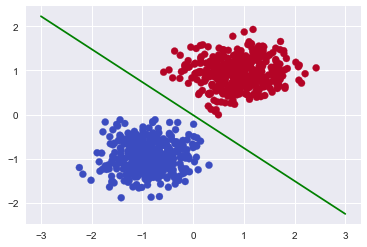

In [138]:
x1 = np.arange(-3, 4)

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap= plt.cm.coolwarm)
x3 = -(0.0470603 + 3.15622177*x1)/4.23145731
plt.plot(x1, x3, "green")
plt.show()

In [139]:
# Accuracy

In [140]:
def predict(X, theta):
    X0 = np.ones((X.shape[0],1))
    X = np.hstack((X0, X))
    
    h = hypothesis(X, theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    
    return output

In [142]:
Y_ = predict(X_train, theta_list[len(theta_list)-1])

In [155]:
def accuracy(actual, pred):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    acc = np.sum(actual==pred)/actual.shape[0]
    
    return acc*100

In [156]:
accuracy(Y_train, Y_)

100.0

In [159]:
Ytest = predict(X_test, theta_list[len(theta_list)-1])
accuracy(Y_test, Ytest)

100.0

# Logistic Regression using Sk-learn

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
model = LogisticRegression()

In [170]:
Y_train.shape

(800,)

In [163]:
model.fit(X_train, Y_train)

LogisticRegression()

In [164]:
theta0 = model.intercept_
thetas = model.coef_

In [165]:
print(theta0, thetas)

[0.04891753] [[2.78735501 4.05778436]]


In [167]:
print(theta_list[len(theta_list)-1])

[[0.0470603 ]
 [3.15622177]
 [4.23145731]]


In [168]:
model.score(X_train, Y_train)

1.0

In [169]:
model.score(X_test, Y_test)

1.0